In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import transforms
import seaborn as sns
import sklearn.model_selection as model_selection
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFECV
from sklearn import  linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
%matplotlib inline

In [ ]:
porto=pd.read_csv("/content/drive/My Drive/porto-seguro/train.csv");

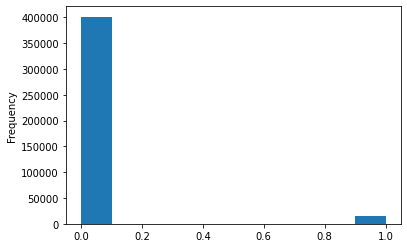

In [ ]:
porto.target.plot.hist()

In [ ]:
portowtnan=porto.replace(-1,np.nan)

In [ ]:
portowtnan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416648 entries, 0 to 416647
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              416648 non-null  int64  
 1   target          416648 non-null  int64  
 2   ps_ind_01       416648 non-null  int64  
 3   ps_ind_02_cat   416500 non-null  float64
 4   ps_ind_03       416648 non-null  int64  
 5   ps_ind_04_cat   416593 non-null  float64
 6   ps_ind_05_cat   412601 non-null  float64
 7   ps_ind_06_bin   416648 non-null  int64  
 8   ps_ind_07_bin   416648 non-null  int64  
 9   ps_ind_08_bin   416648 non-null  int64  
 10  ps_ind_09_bin   416648 non-null  int64  
 11  ps_ind_10_bin   416648 non-null  int64  
 12  ps_ind_11_bin   416648 non-null  int64  
 13  ps_ind_12_bin   416648 non-null  int64  
 14  ps_ind_13_bin   416648 non-null  int64  
 15  ps_ind_14       416648 non-null  int64  
 16  ps_ind_15       416648 non-null  int64  
 17  ps_ind_16_

In [ ]:
portowtnan.drop(columns=['ps_car_03_cat'],axis=1,inplace=True)
target=portowtnan['target']
portowtnan.drop(columns=['target'],axis=1,inplace=True)
cols=portowtnan.columns

In [ ]:
features_train, features_test, target_train, target_test = train_test_split(
portowtnan,target, test_size=0.10, random_state=1)


In [ ]:
portowtnan=features_train

In [ ]:
imp=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(portowtnan)
portoclean=pd.DataFrame(imp.transform(portowtnan),columns=cols)
features_test=pd.DataFrame(imp.transform(features_test),columns=cols)
portoclean.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,1078530.0,1.0,3.0,5.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.9,0.8,0.611351,11.0,0.0,8.0,1.0,13.0,1.0,1.0,0.0,1.0,20.0,3.0,0.447214,0.858646,0.429535,2.645751,0.9,0.8,0.2,3.0,1.0,8.0,4.0,8.0,2.0,7.0,5.0,1.0,3.0,8.0,0.0,1.0,0.0,0.0,0.0,1.0
1,969757.0,3.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,1.0,0.0,0.7,0.6,0.985203,9.0,1.0,0.0,0.0,10.0,1.0,1.0,1.0,1.0,28.0,3.0,0.374166,0.839114,0.324808,3.000000,0.5,0.3,0.7,3.0,3.0,7.0,3.0,10.0,2.0,10.0,4.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0
2,133817.0,5.0,1.0,6.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,1.0,0.0,0.7,0.0,0.633936,10.0,1.0,0.0,1.0,11.0,1.0,1.0,0.0,1.0,99.0,2.0,0.315595,0.558240,0.368782,2.000000,0.1,0.5,0.9,2.0,0.0,6.0,2.0,10.0,1.0,8.0,7.0,0.0,1.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0
3,504553.0,0.0,1.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,1.0,0.0,0.0,0.9,0.2,0.590551,6.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,70.0,3.0,0.374166,0.778455,0.393700,3.162278,0.6,0.4,0.2,1.0,1.0,8.0,1.0,8.0,1.0,8.0,3.0,0.0,4.0,13.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1303515.0,1.0,1.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.4,0.0,0.881760,11.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,10.0,2.0,0.316228,0.609955,0.376829,2.645751,0.0,0.2,0.1,1.0,3.0,4.0,2.0,6.0,4.0,9.0,5.0,1.0,4.0,12.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
portoclean.drop(columns=['id'],axis=1,inplace=True)
features_test.drop(columns=['id'],axis=1,inplace=True)

In [ ]:
portobin=[cols for cols in portoclean.columns if cols.find("bin")!=-1 ]
portocat=[cols for cols in portoclean.columns if cols.find("cat")!=-1 ]
portonormal=[cols for cols in portoclean.columns if cols.find("bin")==-1 & cols.find("cat")==-1 ]

In [ ]:
portobin

['ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

In [ ]:
prbin=portoclean.loc[:,portobin]
prbin

,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374978,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
374979,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
374980,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
374981,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0


In [ ]:
thresholder = VarianceThreshold(threshold=(.75 * (1 - .75)))
prbin=thresholder.fit_transform(prbin)

In [ ]:
prbin.shape

(374983, 7)

In [ ]:
selected=pd.Series(portobin)[thresholder.get_support()]
selected

0      ps_ind_06_bin
1      ps_ind_07_bin
8      ps_ind_16_bin
12    ps_calc_16_bin
13    ps_calc_17_bin
14    ps_calc_18_bin
15    ps_calc_19_bin
dtype: object

In [ ]:
prbin=pd.DataFrame(prbin,columns=selected) #selected binary features
prbin

,ps_ind_06_bin,ps_ind_07_bin,ps_ind_16_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
374978,1.0,0.0,1.0,1.0,0.0,1.0,0.0
374979,0.0,1.0,0.0,0.0,0.0,0.0,0.0
374980,0.0,1.0,0.0,1.0,1.0,0.0,1.0
374981,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
portocat

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [ ]:
prcat=portoclean.loc[:,portocat]
prcat

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
0,3.0,1.0,0.0,11.0,0.0,8.0,1.0,13.0,1.0,1.0,0.0,1.0,20.0
1,1.0,0.0,0.0,9.0,1.0,0.0,0.0,10.0,1.0,1.0,1.0,1.0,28.0
2,1.0,1.0,0.0,10.0,1.0,0.0,1.0,11.0,1.0,1.0,0.0,1.0,99.0
3,1.0,0.0,0.0,6.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,70.0
4,1.0,0.0,0.0,11.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374978,1.0,1.0,0.0,5.0,1.0,0.0,0.0,11.0,1.0,1.0,2.0,1.0,99.0
374979,1.0,1.0,0.0,5.0,1.0,0.0,0.0,14.0,1.0,1.0,2.0,1.0,49.0
374980,1.0,0.0,6.0,11.0,0.0,0.0,0.0,11.0,1.0,1.0,2.0,1.0,69.0
374981,1.0,0.0,4.0,7.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,25.0


In [ ]:
prcat=prcat.astype(int)
chi2_selector = SelectKBest(chi2, k=6)
prcat = chi2_selector.fit_transform(prcat,target_train)
prcat.shape

(374983, 6)

In [ ]:
selectedcat=pd.Series(portocat)[chi2_selector.get_support()]
selectedcat

2     ps_ind_05_cat
3     ps_car_01_cat
4     ps_car_02_cat
5     ps_car_04_cat
7     ps_car_06_cat
12    ps_car_11_cat
dtype: object

In [ ]:
chi2_selector.scores_

array([3.51474163e+00, 1.87518744e+01, 1.55776592e+03, 8.68440550e+01,
       6.55351748e+01, 2.85438671e+03, 1.63424167e+01, 2.29145944e+02,
       7.23545516e+00, 2.97843552e+01, 9.36968241e+00, 2.72927218e-03,
       1.44530847e+02])

In [ ]:
prcat=pd.DataFrame(prcat,columns=selectedcat) #selected binary features
prcat

,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_11_cat
0,0,11,0,8,13,20
1,0,9,1,0,10,28
2,0,10,1,0,11,99
3,0,6,1,0,1,70
4,0,11,1,0,1,10
...,...,...,...,...,...,...
374978,0,5,1,0,11,99
374979,0,5,1,0,14,49
374980,6,11,0,0,11,69
374981,4,7,1,0,1,25


In [ ]:
prcat.nunique()

ps_ind_05_cat      7
ps_car_01_cat     12
ps_car_02_cat      2
ps_car_04_cat     10
ps_car_06_cat     18
ps_car_11_cat    104
dtype: int64

In [ ]:
portonormal

['ps_ind_01',
 'ps_ind_03',
 'ps_ind_14',
 'ps_ind_15',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14']

In [ ]:
prnor=portoclean.loc[:,portonormal]
prnor

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
0,1.0,5.0,0.0,6.0,0.9,0.8,0.611351,3.0,0.447214,0.858646,0.429535,2.645751,0.9,0.8,0.2,3.0,1.0,8.0,4.0,8.0,2.0,7.0,5.0,1.0,3.0,8.0
1,3.0,3.0,0.0,11.0,0.7,0.6,0.985203,3.0,0.374166,0.839114,0.324808,3.000000,0.5,0.3,0.7,3.0,3.0,7.0,3.0,10.0,2.0,10.0,4.0,1.0,1.0,2.0
2,5.0,6.0,0.0,13.0,0.7,0.0,0.633936,2.0,0.315595,0.558240,0.368782,2.000000,0.1,0.5,0.9,2.0,0.0,6.0,2.0,10.0,1.0,8.0,7.0,0.0,1.0,9.0
3,0.0,10.0,0.0,13.0,0.9,0.2,0.590551,3.0,0.374166,0.778455,0.393700,3.162278,0.6,0.4,0.2,1.0,1.0,8.0,1.0,8.0,1.0,8.0,3.0,0.0,4.0,13.0
4,1.0,5.0,0.0,3.0,0.4,0.0,0.881760,2.0,0.316228,0.609955,0.376829,2.645751,0.0,0.2,0.1,1.0,3.0,4.0,2.0,6.0,4.0,9.0,5.0,1.0,4.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374978,2.0,5.0,0.0,13.0,0.1,0.1,0.633936,2.0,0.316228,0.578899,0.303315,2.449490,0.3,0.2,0.1,2.0,1.0,8.0,2.0,11.0,2.0,7.0,1.0,2.0,3.0,14.0
374979,0.0,2.0,0.0,8.0,0.9,0.5,0.675463,3.0,0.400000,0.800839,0.361525,3.605551,0.1,0.4,0.4,2.0,0.0,9.0,5.0,7.0,2.0,7.0,6.0,2.0,1.0,11.0
374980,0.0,4.0,0.0,3.0,0.9,0.6,0.950000,3.0,0.424264,1.104695,0.353553,3.605551,0.1,0.6,0.1,3.0,3.0,7.0,2.0,11.0,1.0,6.0,8.0,1.0,2.0,6.0
374981,5.0,5.0,0.0,8.0,0.6,0.0,0.882468,3.0,0.374166,0.816521,0.361525,3.605551,0.1,0.2,0.3,4.0,1.0,8.0,2.0,11.0,2.0,9.0,6.0,1.0,3.0,6.0


In [ ]:
logit = linear_model.LogisticRegression(max_iter=3000,class_weight='balanced')
# Recursively eliminate features
rfecv = RFECV(estimator=logit, step=1, scoring="roc_auc")
rfecv.fit(prnor, target_train)
rfecv.transform(prnor)

array([[ 1. ,  0. ,  6. , ...,  0.9,  0.8,  0.2],
       [ 3. ,  0. , 11. , ...,  0.5,  0.3,  0.7],
       [ 5. ,  0. , 13. , ...,  0.1,  0.5,  0.9],
       ...,
       [ 0. ,  0. ,  3. , ...,  0.1,  0.6,  0.1],
       [ 5. ,  0. ,  8. , ...,  0.1,  0.2,  0.3],
       [ 4. ,  0. ,  2. , ...,  0.7,  0.2,  0.3]])

In [ ]:
prnor.columns[rfecv.get_support()]

Index(['ps_ind_01', 'ps_ind_14', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02',
       'ps_reg_03', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03'],
      dtype='object')

In [ ]:
(rfecv.grid_scores_)*2-1

array([0.11364135, 0.11802764, 0.16087318, 0.17620708, 0.18667934,
       0.18621808, 0.18613091, 0.18627248, 0.18882595, 0.18896995,
       0.18946703, 0.1966167 , 0.19897136, 0.19953659, 0.19896413,
       0.19874054, 0.19899914, 0.19873748, 0.19877787, 0.19845451,
       0.19834587, 0.19820784, 0.19816642, 0.19817653, 0.1981197 ,
       0.19810382])

In [ ]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 14


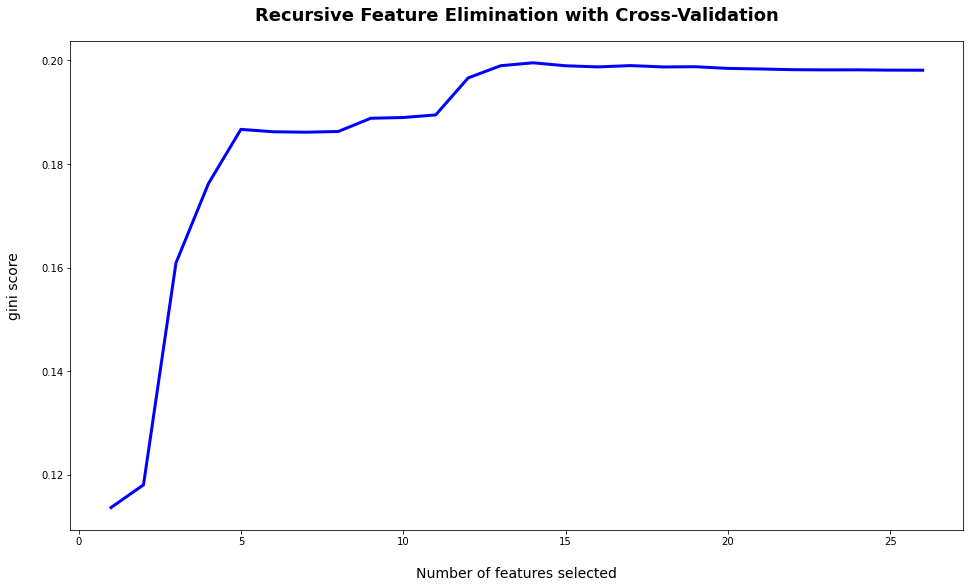

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('gini score', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), (rfecv.grid_scores_)*2-1, color='blue', linewidth=3)

plt.show()

In [ ]:
selectednorm=pd.Series(['ps_ind_01', 'ps_ind_14', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02',
       'ps_reg_03', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03'])
selectednorm

0      ps_ind_01
1      ps_ind_14
2      ps_ind_15
3      ps_reg_01
4      ps_reg_02
5      ps_reg_03
6      ps_car_11
7      ps_car_12
8      ps_car_13
9      ps_car_14
10     ps_car_15
11    ps_calc_01
12    ps_calc_02
13    ps_calc_03
dtype: object

In [ ]:
prnor_=prnor.loc[:,selectednorm]
prnor_

,ps_ind_01,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
0,1.0,0.0,6.0,0.9,0.8,0.611351,3.0,0.447214,0.858646,0.429535,2.645751,0.9,0.8,0.2
1,3.0,0.0,11.0,0.7,0.6,0.985203,3.0,0.374166,0.839114,0.324808,3.000000,0.5,0.3,0.7
2,5.0,0.0,13.0,0.7,0.0,0.633936,2.0,0.315595,0.558240,0.368782,2.000000,0.1,0.5,0.9
3,0.0,0.0,13.0,0.9,0.2,0.590551,3.0,0.374166,0.778455,0.393700,3.162278,0.6,0.4,0.2
4,1.0,0.0,3.0,0.4,0.0,0.881760,2.0,0.316228,0.609955,0.376829,2.645751,0.0,0.2,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374978,2.0,0.0,13.0,0.1,0.1,0.633936,2.0,0.316228,0.578899,0.303315,2.449490,0.3,0.2,0.1
374979,0.0,0.0,8.0,0.9,0.5,0.675463,3.0,0.400000,0.800839,0.361525,3.605551,0.1,0.4,0.4
374980,0.0,0.0,3.0,0.9,0.6,0.950000,3.0,0.424264,1.104695,0.353553,3.605551,0.1,0.6,0.1
374981,5.0,0.0,8.0,0.6,0.0,0.882468,3.0,0.374166,0.816521,0.361525,3.605551,0.1,0.2,0.3


In [ ]:
features_train=pd.concat([prbin,prcat,prnor_],ignore_index=True,join='outer',axis=1)
selectedfeatures=pd.concat([selected,selectedcat,selectednorm],axis=0,ignore_index=True)

In [ ]:
features_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0,11,0,8,13,20,1.0,0.0,6.0,0.9,0.8,0.611351,3.0,0.447214,0.858646,0.429535,2.645751,0.9,0.8,0.2
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,9,1,0,10,28,3.0,0.0,11.0,0.7,0.6,0.985203,3.0,0.374166,0.839114,0.324808,3.000000,0.5,0.3,0.7
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,10,1,0,11,99,5.0,0.0,13.0,0.7,0.0,0.633936,2.0,0.315595,0.558240,0.368782,2.000000,0.1,0.5,0.9
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0,6,1,0,1,70,0.0,0.0,13.0,0.9,0.2,0.590551,3.0,0.374166,0.778455,0.393700,3.162278,0.6,0.4,0.2
4,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0,11,1,0,1,10,1.0,0.0,3.0,0.4,0.0,0.881760,2.0,0.316228,0.609955,0.376829,2.645751,0.0,0.2,0.1


In [ ]:
selectedfeatures

0      ps_ind_06_bin
1      ps_ind_07_bin
2      ps_ind_16_bin
3     ps_calc_16_bin
4     ps_calc_17_bin
5     ps_calc_18_bin
6     ps_calc_19_bin
7      ps_ind_05_cat
8      ps_car_01_cat
9      ps_car_02_cat
10     ps_car_04_cat
11     ps_car_06_cat
12     ps_car_11_cat
13         ps_ind_01
14         ps_ind_14
15         ps_ind_15
16         ps_reg_01
17         ps_reg_02
18         ps_reg_03
19         ps_car_11
20         ps_car_12
21         ps_car_13
22         ps_car_14
23         ps_car_15
24        ps_calc_01
25        ps_calc_02
26        ps_calc_03
dtype: object

In [ ]:
logit = linear_model.LogisticRegression(max_iter=3000,class_weight='balanced')
score=cross_val_score(logit, features_train, target_train, scoring='roc_auc')

In [ ]:
score*2-1

array([0.21533377, 0.22274959, 0.23121011, 0.22770041, 0.22428344])

In [ ]:
logit = linear_model.LogisticRegression(max_iter=1000,class_weight='balanced')
logit.fit(features_train,target_train)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
features_test=features_test.loc[:,selectedfeatures]
target_hat=logit.predict(features_test)

In [ ]:
score_test=roc_auc_score(target_test,target_hat,average='weighted')

In [ ]:
score_test*2-1

0.15678422653384727

In [ ]:
testdata=pd.read_csv('/content/drive/My Drive/porto-seguro/test.csv')

In [ ]:
id=testdata['id']

In [ ]:
testdata.replace(-1,np.nan)

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,1225226,5,2.0,1,0.0,0.0,0,0,1,0,0,0,0,0,0,11,1,0,0,0.0,0.0,NaN,0.0,0.0,NaN,0,1.0,10,1.0,1,0.0,1,83,2.0,0.424264,0.905824,0.418569,2.828427,0.5,0.5,0.2,1,2,7,5,9,2,6,6,1,3,6,0,1,1,0,0,0
1,487111,2,3.0,3,1.0,0.0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.3,0.508060,3.0,1.0,NaN,0,NaN,1,1.0,1,2.0,1,64,3.0,0.315278,0.435629,0.361248,0.000000,0.0,0.0,0.3,3,1,7,2,8,2,9,3,4,0,7,0,1,0,0,1,0
2,1328243,1,1.0,2,1.0,0.0,0,1,0,0,0,0,0,0,0,3,0,1,0,0.9,0.4,0.840387,11.0,0.0,0.0,0,0.0,10,1.0,1,1.0,0,55,2.0,0.447214,1.266333,0.361386,3.741657,0.6,0.3,0.4,1,1,6,2,9,2,8,4,1,2,8,0,1,1,1,0,0
3,388051,2,2.0,2,0.0,0.0,0,0,0,1,0,0,0,0,0,8,1,0,0,0.8,0.3,0.724137,7.0,1.0,NaN,0,NaN,10,1.0,1,2.0,1,28,3.0,0.374166,0.640700,0.378814,2.000000,0.4,0.5,0.6,3,3,8,5,7,2,6,7,0,2,6,0,1,1,1,1,1
4,1454785,0,2.0,5,1.0,0.0,0,1,0,0,0,0,0,0,0,5,1,0,0,0.5,0.3,1.048809,10.0,0.0,NaN,8,1.0,13,1.0,1,0.0,1,20,3.0,0.447214,0.804507,0.429535,2.449490,0.2,0.0,0.3,4,2,7,2,9,4,9,3,1,4,4,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178559,241164,1,1.0,4,0.0,0.0,0,0,0,1,0,0,0,0,0,7,1,0,0,0.0,0.0,0.464354,11.0,1.0,NaN,0,NaN,11,1.0,1,2.0,1,67,2.0,0.374166,0.735704,0.366606,3.464102,0.2,0.0,0.4,3,3,7,2,11,4,7,6,0,3,12,0,1,1,1,0,0
178560,720555,1,2.0,1,1.0,0.0,0,1,0,0,0,0,0,0,0,10,1,0,0,0.9,1.0,1.080798,11.0,1.0,NaN,0,NaN,10,1.0,1,2.0,1,28,3.0,0.374166,0.965521,0.378814,3.605551,0.6,0.3,0.2,0,0,8,3,8,3,9,3,1,2,7,0,1,1,0,0,0
178561,65816,1,1.0,3,1.0,0.0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.1,0.3,NaN,10.0,0.0,NaN,0,1.0,15,1.0,1,0.0,1,5,2.0,0.424264,0.756979,0.400000,2.000000,0.3,0.3,0.8,2,4,7,4,10,3,17,5,3,3,7,0,0,1,1,1,0
178562,538640,0,1.0,5,0.0,0.0,1,0,0,0,0,0,0,0,0,2,0,0,1,0.9,0.2,0.715017,7.0,1.0,NaN,0,NaN,11,1.0,1,0.0,0,11,2.0,0.316228,0.674506,0.368782,3.316625,0.9,0.0,0.5,4,1,8,1,11,3,6,5,2,5,6,0,0,1,0,1,0


In [ ]:
testdata.drop(columns=['ps_car_03_cat'],axis=1,inplace=True)
testdata=pd.DataFrame(imp.transform(testdata),columns=cols)
testdata.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,1225226.0,5.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,1.0,0.0,0.0,0.0,0.0,-1.000000,0.0,0.0,0.0,1.0,10.0,1.0,1.0,0.0,1.0,83.0,2.0,0.424264,0.905824,0.418569,2.828427,0.5,0.5,0.2,1.0,2.0,7.0,5.0,9.0,2.0,6.0,6.0,1.0,3.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0
1,487111.0,2.0,3.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0,0.9,0.3,0.508060,3.0,1.0,0.0,-1.0,1.0,1.0,1.0,2.0,1.0,64.0,3.0,0.315278,0.435629,0.361248,0.000000,0.0,0.0,0.3,3.0,1.0,7.0,2.0,8.0,2.0,9.0,3.0,4.0,0.0,7.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1328243.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.9,0.4,0.840387,11.0,0.0,0.0,0.0,10.0,1.0,1.0,1.0,0.0,55.0,2.0,0.447214,1.266333,0.361386,3.741657,0.6,0.3,0.4,1.0,1.0,6.0,2.0,9.0,2.0,8.0,4.0,1.0,2.0,8.0,0.0,1.0,1.0,1.0,0.0,0.0
3,388051.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0,0.8,0.3,0.724137,7.0,1.0,0.0,-1.0,10.0,1.0,1.0,2.0,1.0,28.0,3.0,0.374166,0.640700,0.378814,2.000000,0.4,0.5,0.6,3.0,3.0,8.0,5.0,7.0,2.0,6.0,7.0,0.0,2.0,6.0,0.0,1.0,1.0,1.0,1.0,1.0
4,1454785.0,0.0,2.0,5.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.5,0.3,1.048809,10.0,0.0,8.0,1.0,13.0,1.0,1.0,0.0,1.0,20.0,3.0,0.447214,0.804507,0.429535,2.449490,0.2,0.0,0.3,4.0,2.0,7.0,2.0,9.0,4.0,9.0,3.0,1.0,4.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
testdata.drop(columns=['id'],axis=1,inplace=True)

In [ ]:
testdata.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,5.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,1.0,0.0,0.0,0.0,0.0,-1.000000,0.0,0.0,0.0,1.0,10.0,1.0,1.0,0.0,1.0,83.0,2.0,0.424264,0.905824,0.418569,2.828427,0.5,0.5,0.2,1.0,2.0,7.0,5.0,9.0,2.0,6.0,6.0,1.0,3.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0
1,2.0,3.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0,0.9,0.3,0.508060,3.0,1.0,0.0,-1.0,1.0,1.0,1.0,2.0,1.0,64.0,3.0,0.315278,0.435629,0.361248,0.000000,0.0,0.0,0.3,3.0,1.0,7.0,2.0,8.0,2.0,9.0,3.0,4.0,0.0,7.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.9,0.4,0.840387,11.0,0.0,0.0,0.0,10.0,1.0,1.0,1.0,0.0,55.0,2.0,0.447214,1.266333,0.361386,3.741657,0.6,0.3,0.4,1.0,1.0,6.0,2.0,9.0,2.0,8.0,4.0,1.0,2.0,8.0,0.0,1.0,1.0,1.0,0.0,0.0
3,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0,0.8,0.3,0.724137,7.0,1.0,0.0,-1.0,10.0,1.0,1.0,2.0,1.0,28.0,3.0,0.374166,0.640700,0.378814,2.000000,0.4,0.5,0.6,3.0,3.0,8.0,5.0,7.0,2.0,6.0,7.0,0.0,2.0,6.0,0.0,1.0,1.0,1.0,1.0,1.0
4,0.0,2.0,5.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.5,0.3,1.048809,10.0,0.0,8.0,1.0,13.0,1.0,1.0,0.0,1.0,20.0,3.0,0.447214,0.804507,0.429535,2.449490,0.2,0.0,0.3,4.0,2.0,7.0,2.0,9.0,4.0,9.0,3.0,1.0,4.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
prediction=logit.predict(testdata.loc[:,selectedfeatures])
prediction

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
predictionprob=logit.predict_proba(testdata.loc[:,selectedfeatures])
predictionprob

array([[0.6804944 , 0.3195056 ],
       [0.74048232, 0.25951768],
       [0.3036197 , 0.6963803 ],
       ...,
       [0.71007   , 0.28993   ],
       [0.53366628, 0.46633372],
       [0.66012366, 0.33987634]])

In [ ]:
predictionfinal=pd.DataFrame(id,columns=['id'])
predictionfinal['target']=predictionprob[:,1]
predictionfinal

,id,target
0,1225226,0.319506
1,487111,0.259518
2,1328243,0.696380
3,388051,0.389048
4,1454785,0.463096
...,...,...
178559,241164,0.391442
178560,720555,0.523263
178561,65816,0.289930
178562,538640,0.466334


In [ ]:
logit.classes_

array([0, 1])

In [ ]:
predictionfinal.to_csv('prediction.csv',index=False)